# Dubai Real Estate Case

In [57]:
# This script performs an initial exploration of the Dubai real estate dataset.
# It includes the import of necessary libraries and the first steps to load and inspect the data.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the Dubai real estate dataset
df = pd.read_csv('data/dubai_properties.csv')
df_sampled = df.sample(n=100, random_state=42)



In [140]:
#pip install folium geopandas

# 1.  Data Exploration 

In [58]:
print(df.info()) #datatypes
print(df.describe()) # analysis numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
Address                   73742 non-null object
Rent                      73742 non-null int64
Beds                      73742 non-null int64
Baths                     73742 non-null int64
Type                      73742 non-null object
Area_in_sqft              73742 non-null int64
Rent_per_sqft             73742 non-null float64
Rent_category             73742 non-null object
Frequency                 73742 non-null object
Furnishing                73742 non-null object
Purpose                   73742 non-null object
Posted_date               73742 non-null object
Age_of_listing_in_days    73742 non-null int64
Location                  73742 non-null object
City                      73742 non-null object
Latitude                  73023 non-null float64
Longitude                 73023 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 9.6+ MB
None
          

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64


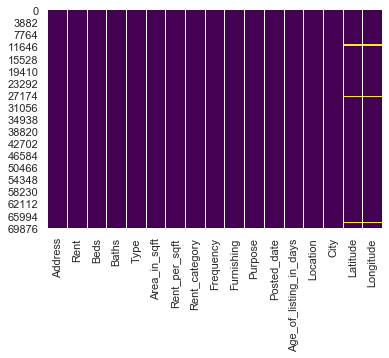

In [59]:
## missing values
# Überprüfen, ob fehlende Werte vorhanden sind
missing_values = df.isnull().sum()
print(missing_values)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [60]:
import folium
import pandas as pd
import numpy as np
from folium import plugins

# Beispiel: 100 zufällige Datensätze aus dem ursprünglichen DataFrame ziehen
df_sampled = df.sample(n=100, random_state=42)

# Erstelle eine Funktion zur Umwandlung von Werten in Farben
def color_producer(value):
    if value < df_sampled['Rent_per_sqft'].quantile(0.25):
        return 'green'
    elif value < df_sampled['Rent_per_sqft'].quantile(0.5):
        return 'yellow'
    elif value < df_sampled['Rent_per_sqft'].quantile(0.75):
        return 'orange'
    else:
        return 'red'

# Erstelle eine Karte, zentriert auf Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=10)  # Dubai

# Durch den neuen DataFrame mit den 100 zufälligen Datensätzen iterieren und farbcodierte Punkte auf der Karte platzieren
for idx, row in df_sampled.iterrows():
    # Überprüfen, ob sowohl Latitude als auch Longitude vorhanden sind
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  # Größe des Punktes
            color=color_producer(row['Rent_per_sqft']),
            fill=True,
            fill_color=color_producer(row['Rent_per_sqft']),
            fill_opacity=0.7
        ).add_to(m)

# Speichern der Karte
m.save('dubai_rent_per_sqft_map.html')

# Zeige die Karte an
m


Variable: Rent
Mean: 147925.00
Std. Deviation: 306965.83
Min: 0.00
25%: 54999.00
50% (Median): 98000.00
75%: 170000.00
Max: 55000000.00




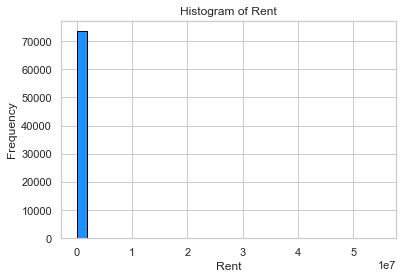

Variable: Beds
Mean: 2.16
Std. Deviation: 1.58
Min: 0.00
25%: 1.00
50% (Median): 2.00
75%: 3.00
Max: 12.00




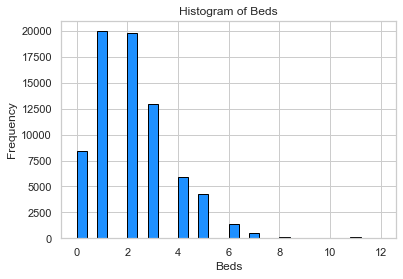

Variable: Baths
Mean: 2.65
Std. Deviation: 1.63
Min: 1.00
25%: 2.00
50% (Median): 2.00
75%: 3.00
Max: 11.00




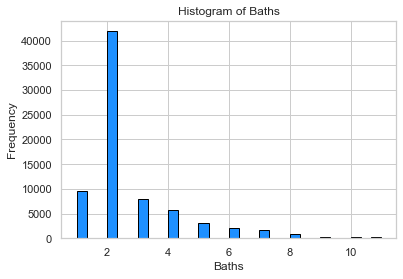

Variable: Area_in_sqft
Mean: 2054.05
Std. Deviation: 3003.92
Min: 74.00
25%: 850.00
50% (Median): 1334.00
75%: 2130.00
Max: 210254.00




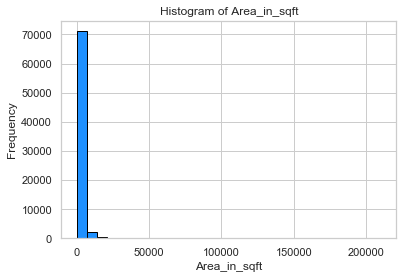

Variable: Rent_per_sqft
Mean: 88.06
Std. Deviation: 66.53
Min: 0.00
25%: 39.98
50% (Median): 71.43
75%: 118.48
Max: 2182.04




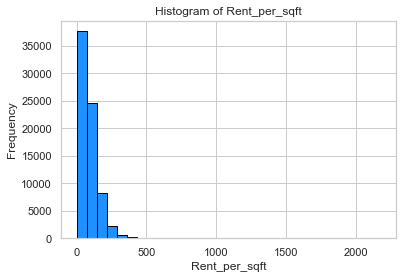

Variable: Age_of_listing_in_days
Mean: 74.26
Std. Deviation: 72.35
Min: 11.00
25%: 30.00
50% (Median): 52.00
75%: 95.00
Max: 2276.00




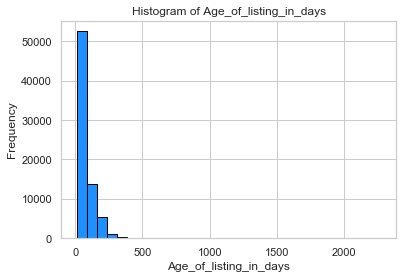

Variable: Latitude
Mean: 24.92
Std. Deviation: 0.57
Min: 15.18
25%: 24.49
50% (Median): 25.08
75%: 25.20
Max: 25.92




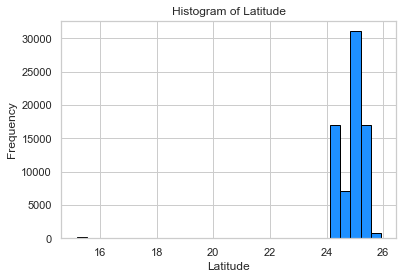

Variable: Longitude
Mean: 55.05
Std. Deviation: 0.65
Min: 43.35
25%: 54.61
50% (Median): 55.24
75%: 55.37
Max: 56.36




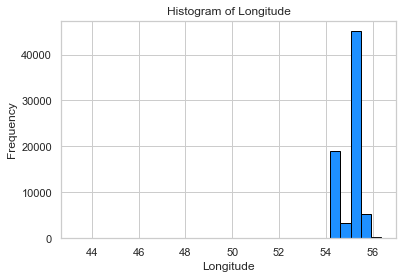

In [61]:
#Plotten der Daten

import pandas as pd
import matplotlib.pyplot as plt

# Numerische Variablen identifizieren
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Iteriere über jede numerische Variable und erstelle die Ausgabe
for var in numerical_vars:
    print(f"Variable: {var}")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Std. Deviation: {df[var].std():.2f}")
    print(f"Min: {df[var].min():.2f}")
    print(f"25%: {df[var].quantile(0.25):.2f}")
    print(f"50% (Median): {df[var].median():.2f}")
    print(f"75%: {df[var].quantile(0.75):.2f}")
    print(f"Max: {df[var].max():.2f}")
    print("\n")
    
    # Histogramm erstellen
    plt.figure(figsize=(6, 4))
    plt.hist(df[var], bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


# Data Cleaning

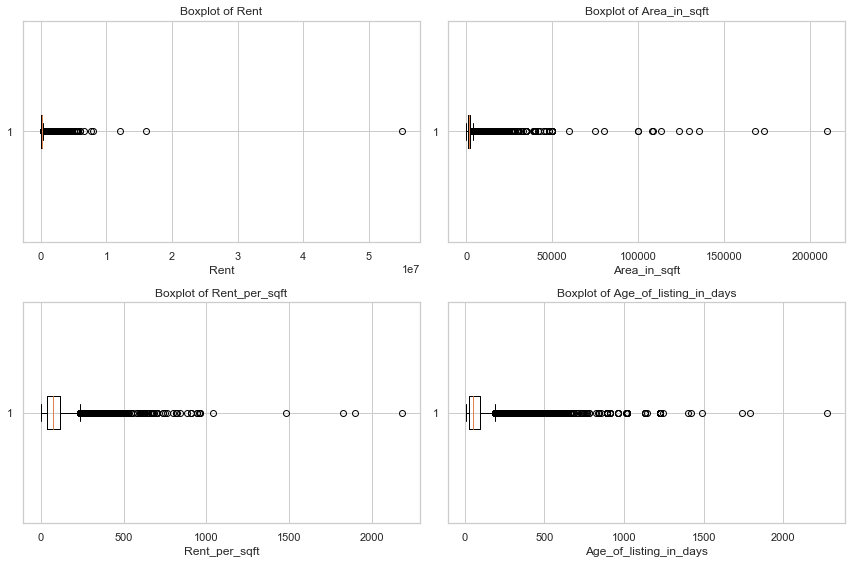

In [62]:
#Extreme werte herausholen für bessere Plots
#Identifikation von Extremwerten via boxplots
import matplotlib.pyplot as plt

# Liste der Variablen
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Erstellung der Boxplots
plt.figure(figsize=(12, 8))

# Boxplot für jede Variable erstellen
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[var].dropna(), vert=False)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [63]:
import numpy as np

# Liste der zu analysierenden Variablen
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Z-Score Berechnung für die ausgewählten Variablen
z_scores = np.abs((df[variables] - df[variables].mean()) / df[variables].std())

# Festlegung eines Schwellenwerts (z.B. Z-Score > 3) zur Identifikation von Ausreißern
threshold = 3

# Zählen der Ausreißer für jede Variable
outlier_counts = (z_scores > threshold).sum()

# Berechnen des Prozentsatzes der Ausreißer im Verhältnis zur Gesamtzahl der Datenpunkte
total_data_points = len(df) #len gibt die Anzahl der Zeilen im df an
outlier_percentages = (outlier_counts / total_data_points) * 100

# Zusammenführen der Ausreißeranzahl und des Prozentsatzes in einem DataFrame
outlier_summary = pd.DataFrame({
    'Outlier Count': outlier_counts,
    'Outlier Percentage': outlier_percentages
})

# Anzeige der Anzahl der Ausreißer und des Prozentsatzes für jede Variable
print("Anzahl und Prozentsatz der Ausreißer basierend auf der Z-Score Methode:")
print(outlier_summary)


Anzahl und Prozentsatz der Ausreißer basierend auf der Z-Score Methode:
                        Outlier Count  Outlier Percentage
Rent                              611            0.828564
Area_in_sqft                     1092            1.480839
Rent_per_sqft                    1002            1.358791
Age_of_listing_in_days           1013            1.373708


In [74]:
# bereinigung des Datensatzes und erstellung df_cleaned
import numpy as np

# Liste der zu analysierenden Variablen
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Z-Score Berechnung für die ausgewählten Variablen
z_scores = np.abs((df[variables] - df[variables].mean()) / df[variables].std())

# Festlegung eines Schwellenwerts (z.B. Z-Score > 3) zur Identifikation von Ausreißern
threshold = 3

# Identifizieren der Ausreißer: True für Ausreißer, False für nicht-Ausreißer
outliers = (z_scores > threshold).any(axis=1)

# Entfernen der Ausreißer aus dem Datensatz
df_cleaned = df[~outliers]

## Aus der Zukunft 

# Entfernen aller Datenpunkte, bei denen Area_in_sqft über 50.000 liegt
df_cleaned = df_cleaned[df_cleaned['Area_in_sqft'] <= 50000]

# Überprüfen, ob die Filterung funktioniert hat
print(f"Anzahl der verbleibenden Datenpunkte: {len(df_cleaned)}")
print(f"Maximaler Wert von Area_in_sqft im bereinigten Datensatz: {df_cleaned['Area_in_sqft'].max()}")


# Ausgabe der Anzahl der entfernten Ausreißer und der neuen Anzahl der Datenpunkte
print(f"Anzahl der entfernten Ausreißer: {outliers.sum()}")
print(f"Anzahl der verbleibenden Datenpunkte: {len(df_cleaned)}")


Anzahl der verbleibenden Datenpunkte: 70436
Maximaler Wert von Area_in_sqft im bereinigten Datensatz: 11039
Anzahl der entfernten Ausreißer: 3306
Anzahl der verbleibenden Datenpunkte: 70436


Variable: Rent
Mean: 147925.00
Std. Deviation: 306965.83
Min: 0.00
25%: 54999.00
50% (Median): 98000.00
75%: 170000.00
Max: 55000000.00




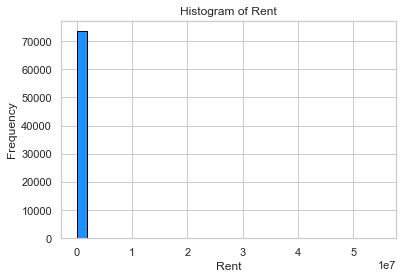

Variable: Beds
Mean: 2.16
Std. Deviation: 1.58
Min: 0.00
25%: 1.00
50% (Median): 2.00
75%: 3.00
Max: 12.00




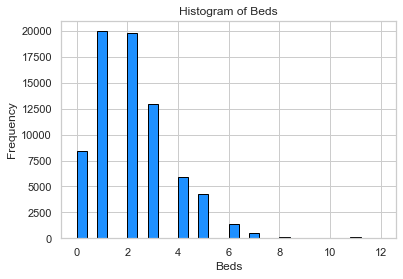

Variable: Baths
Mean: 2.65
Std. Deviation: 1.63
Min: 1.00
25%: 2.00
50% (Median): 2.00
75%: 3.00
Max: 11.00




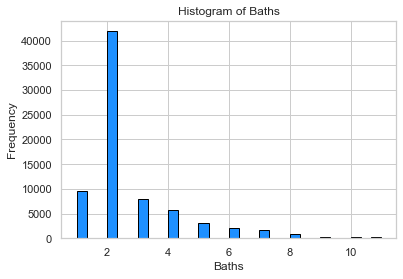

Variable: Area_in_sqft
Mean: 2054.05
Std. Deviation: 3003.92
Min: 74.00
25%: 850.00
50% (Median): 1334.00
75%: 2130.00
Max: 210254.00




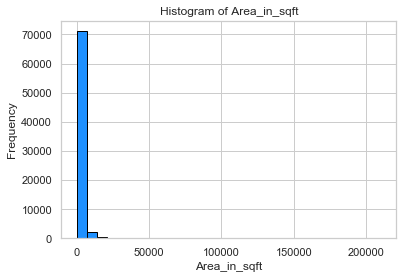

Variable: Rent_per_sqft
Mean: 88.06
Std. Deviation: 66.53
Min: 0.00
25%: 39.98
50% (Median): 71.43
75%: 118.48
Max: 2182.04




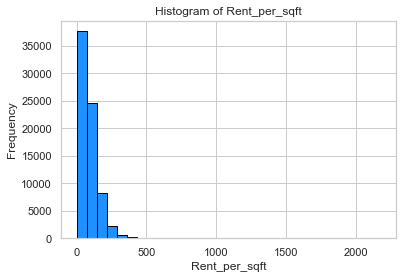

Variable: Age_of_listing_in_days
Mean: 74.26
Std. Deviation: 72.35
Min: 11.00
25%: 30.00
50% (Median): 52.00
75%: 95.00
Max: 2276.00




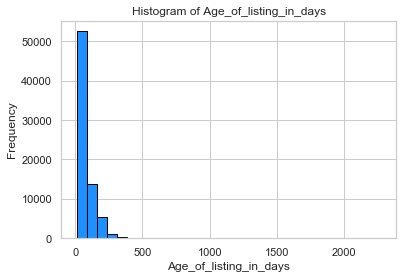

Variable: Latitude
Mean: 24.92
Std. Deviation: 0.57
Min: 15.18
25%: 24.49
50% (Median): 25.08
75%: 25.20
Max: 25.92




C:\Users\merdi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\merdi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


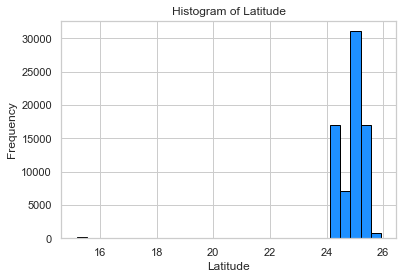

Variable: Longitude
Mean: 55.05
Std. Deviation: 0.65
Min: 43.35
25%: 54.61
50% (Median): 55.24
75%: 55.37
Max: 56.36




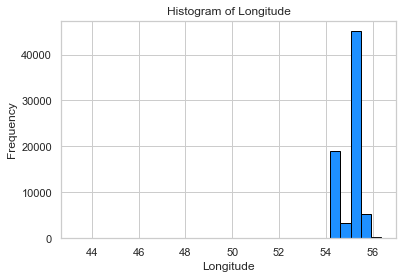

In [75]:
#Plotten der Daten mit df-cleaned
#Plotten der Daten

import pandas as pd
import matplotlib.pyplot as plt

# Numerische Variablen identifizieren
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Iteriere über jede numerische Variable und erstelle die Ausgabe
for var in numerical_vars:
    print(f"Variable: {var}")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Std. Deviation: {df[var].std():.2f}")
    print(f"Min: {df[var].min():.2f}")
    print(f"25%: {df[var].quantile(0.25):.2f}")
    print(f"50% (Median): {df[var].median():.2f}")
    print(f"75%: {df[var].quantile(0.75):.2f}")
    print(f"Max: {df[var].max():.2f}")
    print("\n")
    
    # Histogramm erstellen
    plt.figure(figsize=(6, 4))
    plt.hist(df[var], bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [76]:
import pandas as pd

# Liste der zu vergleichenden Variablen
variables = ['Rent', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Erstellen eines DataFrame für den Vergleich
comparison = pd.DataFrame(index=variables)

# Vergleich für das Original-DataFrame (df)
comparison['Original_Count'] = df[variables].count()
comparison['Original_Mean'] = df[variables].mean()
comparison['Original_Max'] = df[variables].max()

# Vergleich für das bereinigte DataFrame (df_cleaned)
comparison['Cleaned_Count'] = df_cleaned[variables].count()
comparison['Cleaned_Mean'] = df_cleaned[variables].mean()
comparison['Cleaned_Max'] = df_cleaned[variables].max()

# Ausgabe des Vergleichs
print("Vergleich zwischen Original- und Bereinigtem DataFrame:")
print(comparison)


Vergleich zwischen Original- und Bereinigtem DataFrame:
                        Original_Count  Original_Mean  Original_Max  \
Rent                             73742  147925.001668  5.500000e+07   
Area_in_sqft                     73742    2054.053552  2.102540e+05   
Rent_per_sqft                    73742      88.057754  2.182045e+03   
Age_of_listing_in_days           73742      74.261547  2.276000e+03   

                        Cleaned_Count   Cleaned_Mean   Cleaned_Max  
Rent                            70436  126266.572591  1.050000e+06  
Area_in_sqft                    70436    1805.124468  1.103900e+04  
Rent_per_sqft                   70436      84.838071  2.876318e+02  
Age_of_listing_in_days          70436      69.037495  2.910000e+02  


# Data Zusammenhänge

Korrelationsmatrix für den bereinigten Datensatz:
                            Rent      Beds     Baths  Area_in_sqft  \
Rent                    1.000000  0.520338  0.210709      0.522283   
Beds                    0.520338  1.000000  0.763653      0.816566   
Baths                   0.210709  0.763653  1.000000      0.682971   
Area_in_sqft            0.522283  0.816566  0.682971      1.000000   
Rent_per_sqft           0.447058 -0.240183 -0.271359     -0.304152   
Age_of_listing_in_days  0.037305  0.085537  0.088653      0.067869   

                        Rent_per_sqft  Age_of_listing_in_days  
Rent                         0.447058                0.037305  
Beds                        -0.240183                0.085537  
Baths                       -0.271359                0.088653  
Area_in_sqft                -0.304152                0.067869  
Rent_per_sqft                1.000000               -0.046579  
Age_of_listing_in_days      -0.046579                1.000000  


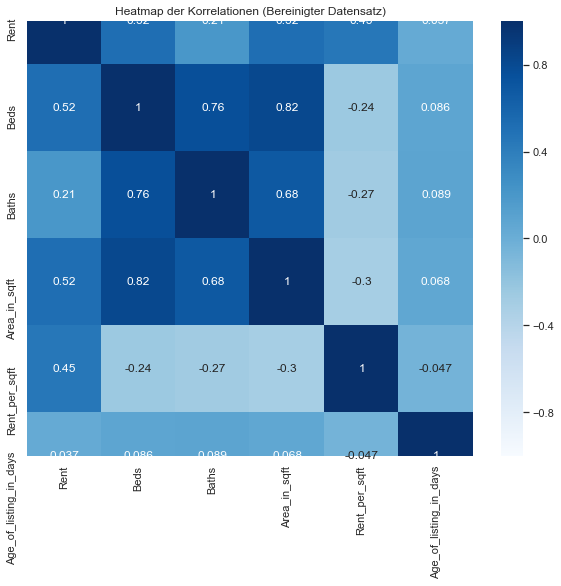

In [79]:
# Korrelationstabellen
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der zu analysierenden Variablen im bereinigten Datensatz
variables = ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Berechnung der Korrelationsmatrix im bereinigten Datensatz
correlation_matrix_cleaned = df_cleaned[variables].corr()

# Ausgabe der Korrelationsmatrix
print("Korrelationsmatrix für den bereinigten Datensatz:")
print(correlation_matrix_cleaned)

# Erstellung einer Heatmap zur Visualisierung der Korrelationsmatrix im bereinigten Datensatz
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Heatmap der Korrelationen (Bereinigter Datensatz)')
plt.show()


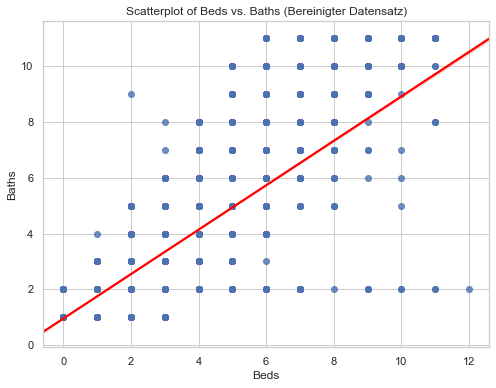

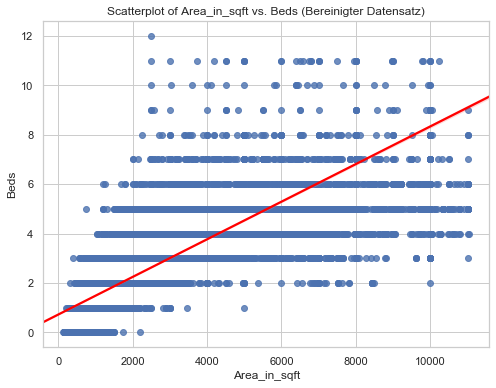

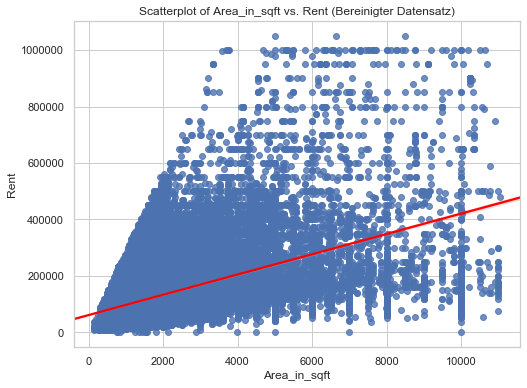

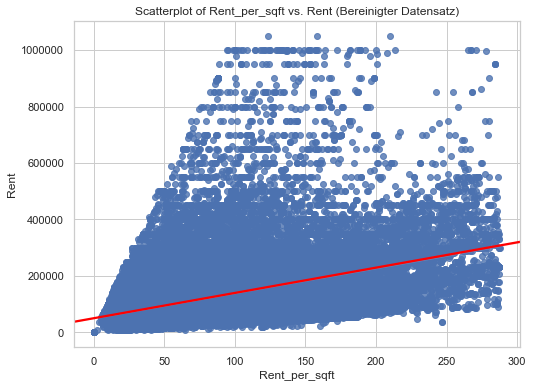

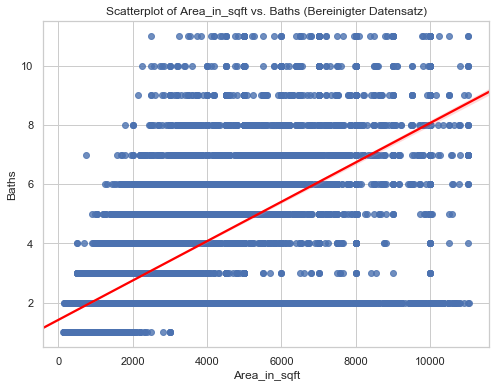

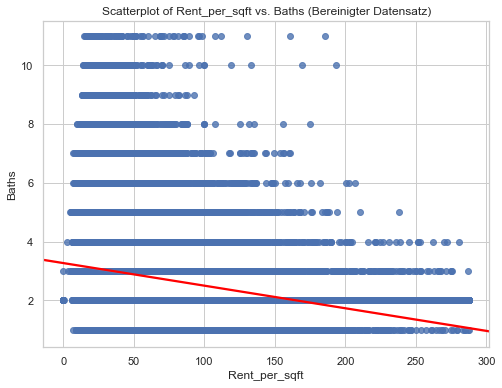

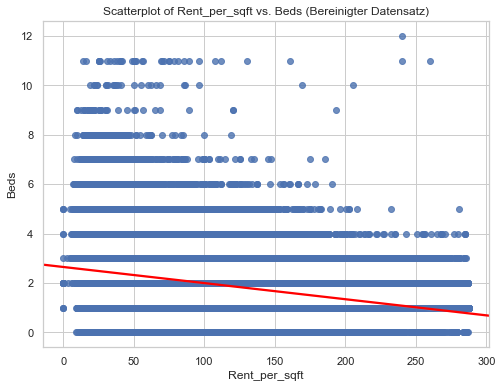

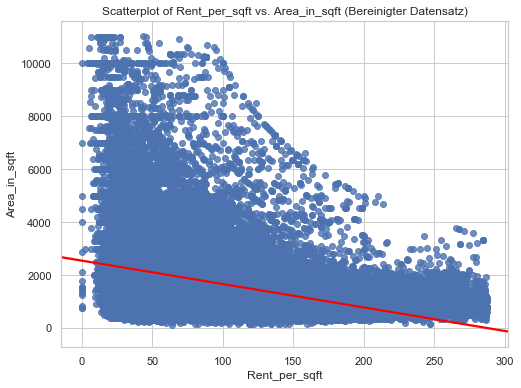

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste der Variablenpaare für die moderaten und negativen Korrelationen im bereinigten Datensatz
variable_pairs = [
    ('Beds', 'Baths'),                 # Starke positive Korrelation
    ('Area_in_sqft', 'Beds'),          # Starke positive Korrelation
    ('Area_in_sqft', 'Rent'),          # Moderate positive Korrelation
    ('Rent_per_sqft', 'Rent'),         # Moderate positive Korrelation
    ('Area_in_sqft', 'Baths'),         # Moderate positive Korrelation
    ('Rent_per_sqft', 'Baths'),        # Negative Korrelation
    ('Rent_per_sqft', 'Beds'),         # Negative Korrelation
    ('Rent_per_sqft', 'Area_in_sqft')  # Negative Korrelation
]

# Iteriere über die Paare und erstelle die Scatterplots mit Regressionslinie für den bereinigten Datensatz
for var1, var2 in variable_pairs:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df_cleaned[var1], y=df_cleaned[var2], line_kws={"color": "red"})
    plt.title(f'Scatterplot of {var1} vs. {var2} (Bereinigter Datensatz)')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()


In [83]:
#Kategorievariablen versthen

In [84]:
import pandas as pd

# Variablen, die analysiert werden sollen
variables_of_interest = ['Rent_category', 'Type', 'Furnishing', 'Purpose']

# Häufigkeitsanalyse
for var in variables_of_interest:
    print(f"\nAnalyse für {var}:")
    print(df_cleaned[var].value_counts())
    print(f"\nModus (häufigste Kategorie): {df_cleaned[var].mode()[0]}")
    print(f"Anzahl der eindeutigen Werte: {df_cleaned[var].nunique()}")



Analyse für Rent_category:
Medium    24701
Low       23627
High      22108
Name: Rent_category, dtype: int64

Modus (häufigste Kategorie): Medium
Anzahl der eindeutigen Werte: 3

Analyse für Type:
Apartment               54833
Villa                   11442
Townhouse                3402
Hotel Apartment           395
Penthouse                 243
Villa Compound             94
Residential Building       21
Residential Plot            3
Residential Floor           3
Name: Type, dtype: int64

Modus (häufigste Kategorie): Apartment
Anzahl der eindeutigen Werte: 9

Analyse für Furnishing:
Unfurnished    55760
Furnished      14676
Name: Furnishing, dtype: int64

Modus (häufigste Kategorie): Unfurnished
Anzahl der eindeutigen Werte: 2

Analyse für Purpose:
For Rent    70436
Name: Purpose, dtype: int64

Modus (häufigste Kategorie): For Rent
Anzahl der eindeutigen Werte: 1


In [89]:
# Numerische Variablen, die dich interessieren
numerical_vars = ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']

# Gruppieren nach 'Rent_category' und Berechnen der Mittelwerte
grouped_means = df_cleaned.groupby('Rent_category')[numerical_vars].mean()

# Tabelle anzeigen
print("Tabelle mit Mittelwerten nach Rent_category:")
print(grouped_means)

# Gruppieren nach 'Type' und Berechnen der Mittelwerte
grouped_means_type = df_cleaned.groupby('Type')[numerical_vars].mean()

# Tabelle anzeigen
print("Tabelle mit Mittelwerten nach Type:")
print(grouped_means_type)

# Gruppieren nach 'Furnishing' und Berechnen der Mittelwerte
grouped_means_furnishing = df_cleaned.groupby('Furnishing')[numerical_vars].mean()

# Tabelle anzeigen
print("Tabelle mit Mittelwerten nach Furnishing:")
print(grouped_means_furnishing)

# Gruppieren nach 'Purpose' und Berechnen der Mittelwerte
grouped_means_purpose = df_cleaned.groupby('Purpose')[numerical_vars].mean()

# Tabelle anzeigen
print("Tabelle mit Mittelwerten nach Purpose:")
print(grouped_means_purpose)


# Tabelle nach Type
print("\nTabelle mit Mittelwerten nach Type:")
print(grouped_means_type)

# Tabelle nach Furnishing
print("\nTabelle mit Mittelwerten nach Furnishing:")
print(grouped_means_furnishing)



Tabelle mit Mittelwerten nach Rent_category:
                        Rent      Beds     Baths  Area_in_sqft  Rent_per_sqft
Rent_category                                                                
High           246035.675276  3.123666  3.126380   2799.176226     116.829962
Low             41673.889068  1.085876  1.792229   1013.865324      53.357706
Medium          99984.884053  2.136472  2.950164   1672.278977      86.316144
Tabelle mit Mittelwerten nach Type:
                               Rent      Beds     Baths  Area_in_sqft  \
Type                                                                    
Apartment             102362.066821  1.545037  2.178250   1213.951671   
Hotel Apartment       189008.797468  1.460759  1.982278   1122.460759   
Penthouse             354803.127572  3.275720  3.259259   3936.037037   
Residential Building  524666.619048  8.333333  8.047619   5953.333333   
Residential Floor     178333.333333  3.333333  2.333333   2914.000000   
Residential Plot  

dfdfdfdf


# Creating Models

In [ ]:
# Creating model for Prediction of rent prices in dubai
# Crating model for prediciton of price per squerefeed in dubai
# Drawing a map with predicted areas for prices
# empfhehlungsalgorythmus, welcher gebäudetyp in welcher gegend der beste ist

In [96]:
# Korrelationen mit rent
# Liste der numerischen Variablen
numerical_vars = ['Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days']

# Berechnung der Korrelationen mit Rent
numerical_correlations = df_cleaned[numerical_vars + ['Rent']].corr()['Rent'].sort_values(ascending=False)

# Ausgabe der Korrelationen
print("Korrelationen der numerischen Variablen mit Rent:")
print(numerical_correlations)

# Liste der kategorialen Variablen
categorical_vars = ['Furnishing']

# Berechnung der Mittelwerte von Rent für jede Kategorie
for var in categorical_vars:
    grouped_means = df_cleaned.groupby(var)['Rent'].mean().sort_values(ascending=False)
    print(f"\nMittelwerte von Rent nach {var}:")
    print(grouped_means)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Durchführung einer ANOVA für jede kategoriale Variable
for var in categorical_vars:
    model = ols(f'Rent ~ C({var})', data=df_cleaned).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA für {var}:")
    print(anova_table)


Korrelationen der numerischen Variablen mit Rent:
Rent                      1.000000
Area_in_sqft              0.522283
Beds                      0.520338
Rent_per_sqft             0.447058
Baths                     0.210709
Age_of_listing_in_days    0.037305
Name: Rent, dtype: float64

Mittelwerte von Rent nach Furnishing:
Furnishing
Furnished      161066.921845
Unfurnished    117107.140638
Name: Rent, dtype: float64

ANOVA für Furnishing:
                     sum_sq       df            F  PR(>F)
C(Furnishing)  2.245158e+13      1.0  1894.754389     0.0
Residual       8.345959e+14  70434.0          NaN     NaN


The recommended variables for the regression are `Area_in_sqft`, `Beds`, `Rent_per_sqft`, `Baths`, and `Furnishing` due to their strong correlations with rent and significant impact in the analysis.

Mean Squared Error (MSE): 6285102922.951426
R-squared (R²): 0.46272214434499204


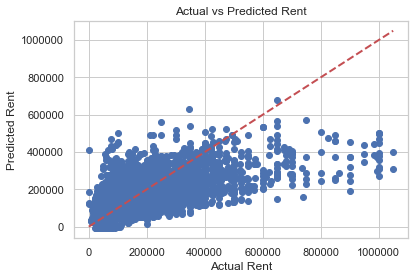

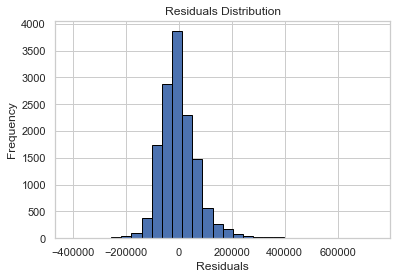

In [142]:
#Creating multiple Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the relevant variables
X = df_cleaned[['Area_in_sqft', 'Beds', 'Baths', 'Furnishing']]
y = df_cleaned['Rent']

# One-Hot Encoding for the categorical variable (Furnishing)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Furnishing'])
    ], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Plotting the residuals
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()

# Histogram of the residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# mit der variable rent per sqft 
# Mean Squared Error (MSE): 2824585242.0997796
# R-squared (R²): 0.7585422035893238

# ohne variable rent per sqft
# Mean Squared Error (MSE): 6285102922.951426
# R-squared (R²): 0.46272214434499204


Random Forest - Mean Squared Error (MSE): 3824321597.9430976
Random Forest - R-squared (R²): 0.673080404145057


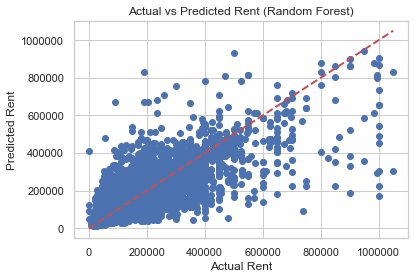

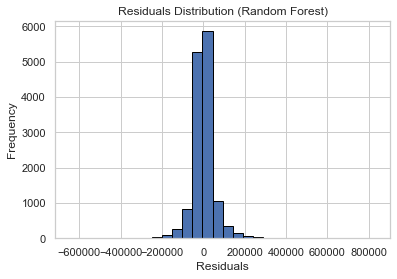

In [143]:
# Random Forest 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the relevant variables from the cleaned dataset
X = df_cleaned[['Area_in_sqft', 'Beds', 'Baths', 'Furnishing']]
y = df_cleaned['Rent']

# One-Hot Encoding for the categorical variable (Furnishing)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Furnishing'])  # drop='first' to avoid the dummy variable trap
    ], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - R-squared (R²): {r2_rf}')

# Plotting the residuals
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent (Random Forest)')
plt.show()

# Histogram of the residuals
residuals = y_test - y_pred_rf
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Mit der Variable rent per sqft
# Random Forest - Mean Squared Error (MSE): 7935586.75690235
# Random Forest - R-squared (R²): 0.9993216316282517
# ohne die variable rent per sqft
# Random Forest - Mean Squared Error (MSE): 3824321597.9430976
# Random Forest - R-squared (R²): 0.673080404145057

Cross-Validation R-squared scores: [0.38554148 0.04301842 0.65126144 0.62308978 0.55829848]
Average R-squared across folds: 0.4522419193025035
                  Feature  Importance
1            Area_in_sqft    0.470772
2                    Beds    0.292934
3                   Baths    0.172763
0  Furnishing_Unfurnished    0.063531


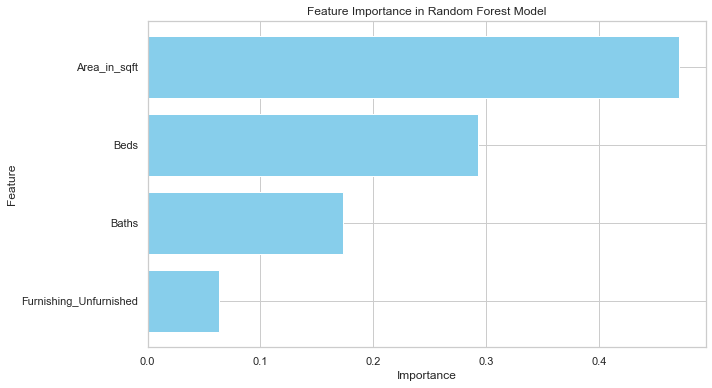

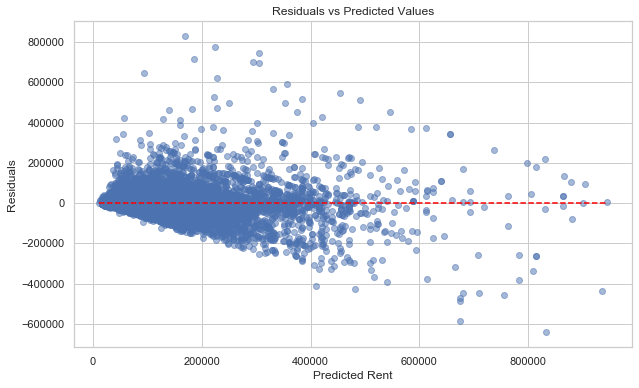

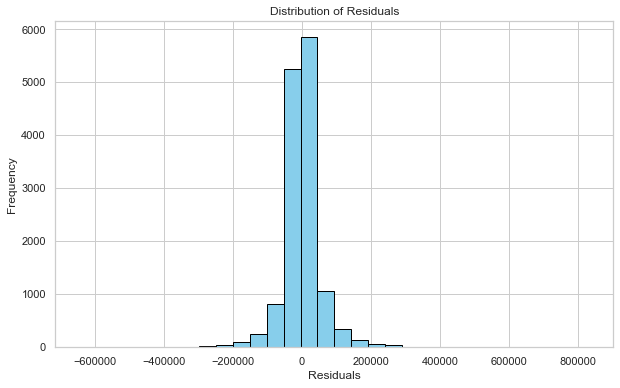

In [144]:
## Cross-Validation

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=5, scoring='r2')

# Display cross-validation results
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Average R-squared across folds: {cv_scores.mean()}')

## Feature Importance

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a list of feature names including the one-hot encoded features
try:
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['Furnishing'])
except AttributeError:
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names(['Furnishing'])

all_feature_names = np.append(feature_names, ['Area_in_sqft', 'Beds', 'Baths'])

# Display feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

## Residual Analysis

# Scatter plot of residuals
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), color='red', linestyles='dashed')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Rent')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



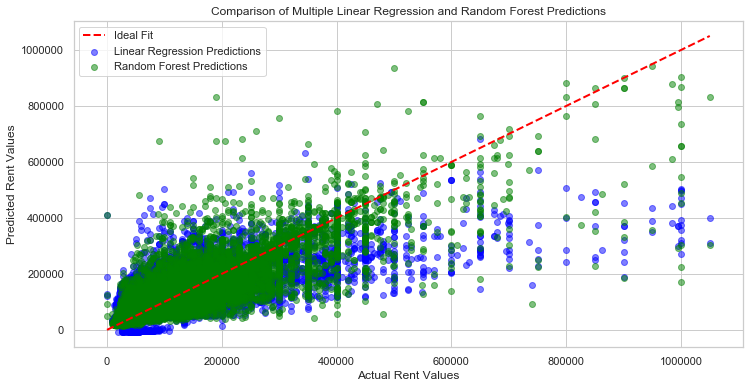

In [145]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual rent values
# Assuming y_pred_lr contains predictions from the Linear Regression model
# Assuming y_pred_rf contains predictions from the Random Forest model

plt.figure(figsize=(12, 6))

# Plot the actual vs. predicted for the Linear Regression model
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Linear Regression Predictions')

# Plot the actual vs. predicted for the Random Forest model
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest Predictions')

# Plot the ideal line where predictions would perfectly match the actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')

# Labels and legend
plt.xlabel('Actual Rent Values')
plt.ylabel('Predicted Rent Values')
plt.title('Comparison of Multiple Linear Regression and Random Forest Predictions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


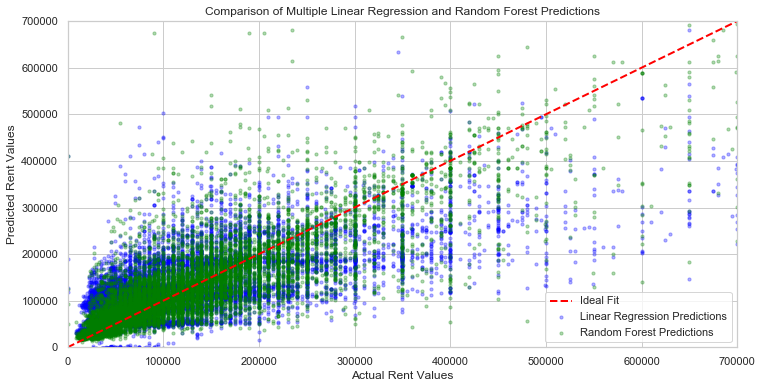

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the actual vs. predicted for the Linear Regression model
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Linear Regression Predictions', s=10)

# Plot the actual vs. predicted for the Random Forest model
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.3, label='Random Forest Predictions', s=10)

# Plot the ideal line where predictions would perfectly match the actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')

# Limit the axis range (optional)
plt.xlim([0, 700000])
plt.ylim([0, 700000])

# Labels and legend
plt.xlabel('Actual Rent Values')
plt.ylabel('Predicted Rent Values')
plt.title('Comparison of Multiple Linear Regression and Random Forest Predictions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The plot compares the predicted rent values from two different models—Multiple Linear Regression and Random Forest—against the actual rent values.

    X-Axis: Represents the actual rent values.
    Y-Axis: Represents the predicted rent values.
    Blue Points: Predictions made by the Multiple Linear Regression model.
    Green Points: Predictions made by the Random Forest model.
    Red Dashed Line: Represents the ideal scenario where predicted values would perfectly match the actual values (i.e., if the model was perfect, all points would lie on this line).

Interpretation:

**Random Forest Model:** The green points (Random Forest predictions) are closer to the red line than the blue points, indicating that the Random Forest model is more accurate in predicting rent values.The Random Forest model captures more of the variance in the data, as seen by the spread of the green points being narrower around the ideal fit line compared to the Multiple Linear Regression model.

**Multiple Linear Regression Model:** The blue points show a wider spread, particularly for higher rent values, which indicates that the Multiple Linear Regression model struggles to accurately predict higher rents. The predictions tend to underestimate or overestimate more frequently as rent increases. The broader spread of points suggests that the linear model may not fully capture the complexity of the relationship between the input features and rent.

Here is the adjusted comparison text based on the new results:

1. **Predictive Performance**  
   The Multiple Linear Regression model has an R² of **0.463** with an MSE of **6.29 billion**. In contrast, the Random Forest model achieves a higher R² of **0.673** with a lower MSE of **3.82 billion**.

2. **Interpretability**  
   Multiple Linear Regression provides clear, interpretable coefficients that directly explain the impact of each feature on rent. The Random Forest model, while more accurate, relies on feature importance scores, which are less transparent.

3. **Generalization**  
   Multiple Linear Regression, with an R² of **0.463**, shows a moderate ability to generalize in simpler, linear scenarios. The Random Forest model, with an R² of **0.673**, demonstrates better performance in capturing more complex relationships.

4. **Residual Analysis**  
   In Multiple Linear Regression, residuals indicate potential non-linearity and model bias, leading to underfitting. The Random Forest model produces more evenly distributed residuals, indicating a better fit, but still leaves room for improvement.

5. **Feature Importance**  
   Multiple Linear Regression allows for direct interpretation of feature impacts, with `Area_in_sqft`, `Beds`, and `Baths` being significant predictors. The Random Forest model also highlights `Area_in_sqft`, `Beds`, and `Baths` as key contributors, but doesn’t specify their exact impacts.

6. **Complexity and Overfitting**  
   Multiple Linear Regression is simpler, easier to deploy, and less prone to overfitting due to its linear nature. The Random Forest model, while more complex and powerful, provides better predictions but requires careful tuning to avoid overfitting.

7. **Model Flexibility**  
   Multiple Linear Regression assumes linear relationships, offering limited flexibility. In contrast, the Random Forest model is more flexible, effectively capturing non-linear relationships and interactions between features.

# Hausempfehlungsanalyse

In [118]:
# Group by house type and calculate the mean Rent_per_sqft
house_type_performance = df.groupby('Type')['Rent_per_sqft'].mean().sort_values(ascending=False)
print("House Type Performance:")
print(house_type_performance)

# Group by location and calculate the mean Rent_per_sqft
location_performance = df.groupby('Location')['Rent_per_sqft'].mean().sort_values(ascending=False)
print("\nLocation Performance:")
print(location_performance)




House Type Performance:
Type
Hotel Apartment         196.812673
Residential Building    150.178247
Residential Floor       143.966339
Penthouse               115.194195
Apartment                94.220899
Townhouse                83.384975
Villa                    57.873569
Villa Compound           46.198270
Residential Plot         21.070414
Name: Rent_per_sqft, dtype: float64

Location Performance:
Location
Bluewaters Island    329.640937
Pearl Jumeirah       232.609087
Dubai Harbour        226.933742
Downtown Dubai       199.156925
Jumeirah Islands     196.578116
                        ...    
Al Qarayen             8.333333
Al Homah               7.812500
Al Rifa                6.250000
Al Noaf                6.193602
Um Ghafah              2.997243
Name: Rent_per_sqft, Length: 441, dtype: float64


In [119]:
# Group by Location and Type and calculate the mean Rent_per_sqft for each group
location_type_performance = df.groupby(['Location', 'Type'])['Rent_per_sqft'].mean().unstack()

# For each location, find the property type with the highest Rent_per_sqft
top_type_per_location = location_type_performance.idxmax(axis=1)
top_rent_per_location = location_type_performance.max(axis=1)

# Combine results into a DataFrame
location_recommendations = pd.DataFrame({
    'Top_Type': top_type_per_location,
    'Highest_Rent_per_sqft': top_rent_per_location
})

# Display the results
print("\nTop Property Type by Location:")
print(location_recommendations.sort_values(by='Highest_Rent_per_sqft', ascending=False))



Top Property Type by Location:
                                            Top_Type  Highest_Rent_per_sqft
Location                                                                   
Al Rashidiya                    Residential Building             650.000000
Dubai Investment Park (DIP)     Residential Building             424.461320
Bluewaters Island                          Penthouse             405.141005
Jumeirah Beach Residence (JBR)                 Villa             359.712230
Al Barsha                       Residential Building             354.166667
...                                              ...                    ...
Al Qarayen                                     Villa               8.333333
Al Homah                                       Villa               7.812500
Al Rifa                                        Villa               6.250000
Al Noaf                                        Villa               6.193602
Um Ghafah                                      Villa    

In [138]:
## Filter missing Geo Data

# Filter out rows without valid Latitude and Longitude
df_geo_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Display the first few rows of df_geo_cleaned to ensure it's correct
print(df_geo_cleaned.head())


                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent  2024-03-07      

In [153]:
## Clustering of Locations

from sklearn.cluster import KMeans

# Perform K-means clustering to group locations into 10 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
df_geo_cleaned['Cluster'] = kmeans.fit_predict(df_geo_cleaned[['Latitude', 'Longitude']])

# Display the first few rows to see the cluster assignment
print(df_geo_cleaned.head())


                                             Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent  2024-03-07      

C:\Users\merdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [154]:
## Determine the opt property type for each cluster

# Group by Cluster and Type to find the top property type per cluster
cluster_type_performance = df_geo_cleaned.groupby(['Cluster', 'Type'])['Rent_per_sqft'].mean().unstack()

# For each cluster, find the property type with the highest Rent_per_sqft
top_type_per_cluster = cluster_type_performance.idxmax(axis=1)
top_rent_per_cluster = cluster_type_performance.max(axis=1)

# Combine results into a DataFrame
cluster_recommendations = pd.DataFrame({
    'Top_Type': top_type_per_cluster,
    'Highest_Rent_per_sqft': top_rent_per_cluster
})

# Display the results
print(cluster_recommendations.sort_values(by='Highest_Rent_per_sqft', ascending=False))


                     Top_Type  Highest_Rent_per_sqft
Cluster                                             
5        Residential Building             354.166667
14       Residential Building             292.430159
18       Residential Building             240.000000
11            Hotel Apartment             187.643693
15       Residential Building             154.231441
12            Hotel Apartment             133.597673
2             Hotel Apartment             132.154593
17       Residential Building             131.997010
6             Hotel Apartment             130.798373
7        Residential Building             100.083292
13                  Townhouse              96.395841
19                  Townhouse              75.000000
1                   Penthouse              70.010684
4              Villa Compound              70.000000
8             Hotel Apartment              69.552173
9                   Apartment              57.400389
0                   Penthouse              49.

In [160]:
## Create Plygons for Each Cluster on the Map

import folium
import geopandas as gpd
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt

# Ensure consistent data for clustering
gdf = gpd.GeoDataFrame(df_geo_cleaned, geometry=gpd.points_from_xy(df_geo_cleaned.Longitude, df_geo_cleaned.Latitude))

# Initialize a Folium map centered on Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=11)

# Define colors for the clusters (20 distinct colors)
colors = plt.cm.get_cmap('tab20', 20)  # 'tab20' provides up to 20 distinct colors
cluster_colors = {i: colors(i) for i in range(20)}  # Adjust to 20 clusters

# Draw polygons around each cluster
for cluster in cluster_recommendations.index:
    points = gdf[gdf['Cluster'] == cluster].geometry
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = MultiPoint(points.tolist()).convex_hull
        folium.GeoJson(
            data=hull.__geo_interface__,
            style_function=lambda x, color=cluster_colors[cluster]: {'fillColor': color, 'color': color, 'weight': 2, 'fillOpacity': 0.5},
            tooltip=f"Cluster {cluster}: {cluster_recommendations.loc[cluster, 'Top_Type']} - {cluster_recommendations.loc[cluster, 'Highest_Rent_per_sqft']:.2f} AED/sqft"
        ).add_to(m)
    else:
        print(f"Cluster {cluster} does not have enough points to form a convex hull.")

# Save the map as an HTML file
m.save('dubai_cluster_map.html')

# Display the map
m



In [161]:
## zweiter versuch mit noch besserer Karte und farben

import folium
import geopandas as gpd
from shapely.geometry import MultiPoint

# Ensure consistent data for clustering
gdf = gpd.GeoDataFrame(df_geo_cleaned, geometry=gpd.points_from_xy(df_geo_cleaned.Longitude, df_geo_cleaned.Latitude))

# Initialize a Folium map centered on Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=11)

# Define colors for each property type
type_colors = {
    'Hotel Apartment': 'red',
    'Penthouse': 'blue',
    'Apartment': 'green',
    'Villa': 'purple',
    'Townhouse': 'orange',
    'Residential Building': 'darkblue',
    'Residential Floor': 'darkgreen',
    'Residential Plot': 'gray',
    'Villa Compound': 'pink'
}

# Draw polygons around each cluster, using colors based on the property type
for cluster in cluster_recommendations.index:
    points = gdf[gdf['Cluster'] == cluster].geometry
    top_type = cluster_recommendations.loc[cluster, 'Top_Type']
    color = type_colors.get(top_type, 'black')  # Default to black if type is not in the dictionary

    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = MultiPoint(points.tolist()).convex_hull
        folium.GeoJson(
            data=hull.__geo_interface__,
            style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 2, 'fillOpacity': 0.5},
            tooltip=f"Cluster {cluster}: {top_type} - {cluster_recommendations.loc[cluster, 'Highest_Rent_per_sqft']:.2f} AED/sqft"
        ).add_to(m)
    else:
        print(f"Cluster {cluster} does not have enough points to form a convex hull.")

# Save the map as an HTML file
m.save('dubai_cluster_map.html')

# Display the map
m


In [162]:
# Premium Map

import folium
import geopandas as gpd
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt

# Ensure consistent data for clustering
gdf = gpd.GeoDataFrame(df_geo_cleaned, geometry=gpd.points_from_xy(df_geo_cleaned.Longitude, df_geo_cleaned.Latitude))

# Initialize a Folium map centered on Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=11)

# Define colors and icons for the property types
type_colors = {
    'Hotel Apartment': 'red',
    'Penthouse': 'blue',
    'Apartment': 'green',
    'Villa': 'purple',
    'Townhouse': 'orange',
    'Residential Building': 'darkblue',
    'Residential Floor': 'darkgreen',
    'Residential Plot': 'gray',
    'Villa Compound': 'pink'
}

type_icons = {
    'Hotel Apartment': 'fa-hotel',
    'Penthouse': 'fa-building',
    'Apartment': 'fa-home',
    'Villa': 'fa-villa',
    'Townhouse': 'fa-house',
    'Residential Building': 'fa-building',
    'Residential Floor': 'fa-th-large',
    'Residential Plot': 'fa-map',
    'Villa Compound': 'fa-house-user'
}

# Draw polygons around each cluster
for cluster in cluster_recommendations.index:
    points = gdf[gdf['Cluster'] == cluster].geometry
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = MultiPoint(points.tolist()).convex_hull
        # Add GeoJson polygons
        folium.GeoJson(
            data=hull.__geo_interface__,
            style_function=lambda x, color=type_colors[cluster_recommendations.loc[cluster, 'Top_Type']]: {
                'fillColor': color, 
                'color': color, 
                'weight': 2, 
                'fillOpacity': 0.5},
            tooltip=f"Cluster {cluster}: {cluster_recommendations.loc[cluster, 'Top_Type']} - {cluster_recommendations.loc[cluster, 'Highest_Rent_per_sqft']:.2f} AED/sqft"
        ).add_to(m)
        # Add icons at the centroid
        centroid = hull.centroid
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=folium.Icon(icon=type_icons[cluster_recommendations.loc[cluster, 'Top_Type']], prefix='fa', color=type_colors[cluster_recommendations.loc[cluster, 'Top_Type']]),
            tooltip=f"{cluster_recommendations.loc[cluster, 'Top_Type']} ({cluster_recommendations.loc[cluster, 'Highest_Rent_per_sqft']:.2f} AED/sqft)"
        ).add_to(m)
    else:
        print(f"Cluster {cluster} does not have enough points to form a convex hull.")

# Add a legend
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 250px; height: 300px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp; <b>Property Type Legend</b> <br>
     &nbsp; <i class="fa fa-hotel" style="color:red"></i> Hotel Apartment<br>
     &nbsp; <i class="fa fa-building" style="color:blue"></i> Penthouse<br>
     &nbsp; <i class="fa fa-home" style="color:green"></i> Apartment<br>
     &nbsp; <i class="fa fa-villa" style="color:purple"></i> Villa<br>
     &nbsp; <i class="fa fa-house" style="color:orange"></i> Townhouse<br>
     &nbsp; <i class="fa fa-building" style="color:darkblue"></i> Residential Building<br>
     &nbsp; <i class="fa fa-th-large" style="color:darkgreen"></i> Residential Floor<br>
     &nbsp; <i class="fa fa-map" style="color:gray"></i> Residential Plot<br>
     &nbsp; <i class="fa fa-house-user" style="color:pink"></i> Villa Compound<br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
m.save('dubai_cluster_map.html')

# Display the map
m
